In [1]:
import statsmodels
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
def plot_ccf(x, y, ax=None, lags=None, alpha=.05, use_vlines=True, unbiased=False,
             fft=False, title='Cross-correlation', zero=True, **kwargs):
    fig, ax = utils.create_mpl_ax(ax)
    lags, nlags, irregular = statsmodels.graphics.tsaplots._prepare_data_corr_plot(x, lags, zero)
    confint = None
    ccf_val = ccf(x, y)
    if lags is not None:
        ccf_val = ccf_val[:nlags+1]
    statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, **kwargs)
    return fig

In [3]:
def acf_impl(x, nlags):
    """
    TODO
    @param x: a 1-d numpy array (data)
    @param nlags: an integer indicating how far back to compute the ACF
    @return a 1-d numpy array with (nlags+1) elements. 
            Where the first element denotes the acf at lag = 0 (1.0 by definition).
    """
    #TODO: replace the template code with your code here. This part will be graded.
    def r(x, y):
        return np.mean((x - x.mean()) * (y - y.mean())) / (x.std() * y.std())
    
    return np.array([1] + [r(x[:-i], x[i:]) for i in range(1, nlags)])

In [4]:
n = 10000
mean = 0
std = 1 
lag = 2
w_t = np.random.normal(mean, std, size=n)

In [5]:
x_t = np.zeros(n)
x_t[0] = 0.5
x_t[1] = 1
for i in range (2, n):
    x_t[i] = 0.7 * x_t[i-1] - 0.1 * x_t[i-2] + w_t[i]

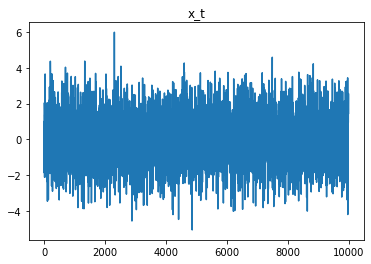

In [6]:
plt.plot(x_t)
plt.title("x_t")
plt.show()

In [7]:
acf_val = acf(x=x_t, nlags=lag, fft=True)
print("StatsModels ACF={}".format(acf_val))

StatsModels ACF=[1.        0.6380166 0.3451316]


In [8]:
phi1 = 0.7
phi2 = -0.1

In [9]:
r1 = phi1/(1-phi2)
r2 = ((phi1 * phi1) + (1-phi2) * phi2)/(1-phi2)
print(r1, r2)

0.6363636363636362 0.34545454545454535


In [10]:
%%latex
$\rho(1)=$0.6363636363636362 $\rho(2)=$=0.34545454545454535

<IPython.core.display.Latex object>

In [ ]:
plt.plot(x_t)
plt.title("x_t")
plt.show()

In [ ]:
x_t = np.random.normal(mean, std, size=2)
y_t = np.zeros(n)
y_t[0] = x_t[0]
y_t[1] = x_t[1]
for i in range (2, n):
    y_t[i] = 0.7 * y_t[i-1] - 0.1 * y_t[i-2] + w_t[i]

In [ ]:
acf_val = acf(x=y_t, nlags=lag, fft=True)
print("StatsModels ACF={}".format(acf_val))
acf_val = acf_impl(x=y_t, nlags=3)
print("Imlemented ACF={}".format(acf_val))

In [ ]:
plt.plot(y_t)
plt.title("y_t")
plt.show()

# plot acf
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.show()

# plot ccf
ccf_val = ccf(y_t, w_t)
plot_ccf(w_t, y_t, title="CCF", lags=lag, vlines_kwargs={})
plt.show()

In [ ]:
p = 2
q = 1
arma_mod = sm.tsa.ARMA(y_t, (0,2)).fit(disp=False)
print(len(arma_mod.params))
print(arma_mod.params)
print("ar_roots={}, ma_roots={}".format(arma_mod.arroots, arma_mod.maroots))
phi1= arma_mod.params[1]
phi2= arma_mod.params[2]
print(phi1, phi2)
r1 = phi1/(1-phi2)
r2 = (phi1* phi1) / (1-phi2) + phi2
rho = np.array([1, r1, r2])
print(rho)

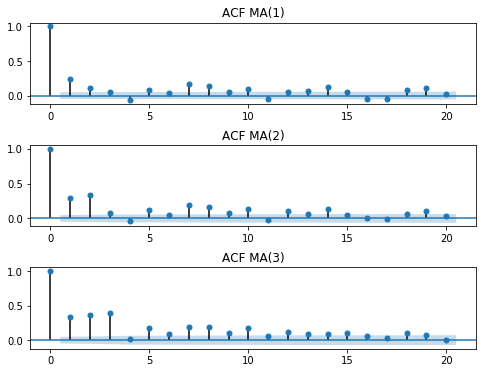

In [36]:
n = 200
mean = 0
std = 1
lag =20

# create white noise
np.random.seed(0)
w_t = np.random.normal(mean, 5, size=n+1) 

ma1 = list(np.random.normal(mean, std, size=1))
for i in range(1, n+1):
    ma1.append(w_t[i] + 0.2 * w_t[i-1])
               
ma2 = list(np.random.normal(mean, std, size=1))
for i in range(2, n+1):
    ma2.append(w_t[i] + 0.2 * w_t[i-1] + 0.3 * w_t[i-2])
               


ma3 = list(np.random.normal(mean, std, size=1))
for i in range(3, n+1):
    ma3.append(w_t[i] + 0.2 * w_t[i-1] + 0.3 * w_t[i-2] + 0.5 * w_t[i-3])


fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(hspace=.5)

ax1 = fig.add_subplot(311)
fig = plot_acf(ma1, lags=lag, ax=ax1, title="ACF MA(1)", alpha=0.5)

ax2 = fig.add_subplot(312)
fig = plot_acf(ma2, lags=lag, ax=ax2, title="ACF MA(2)", alpha=0.5)

ax3 = fig.add_subplot(313)
fig = plot_acf(ma3, lags=lag, ax=ax3, title="ACF MA(3)", alpha=0.5)



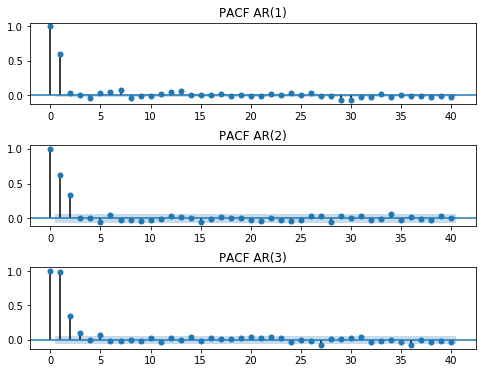

In [35]:
n = 1000
mean = 0
std = 1
lag = 40

np.random.seed(0)
x1_t = w_t = np.random.normal(mean, 5, size=n) 

a=0.6
for t in range(n):
    x1_t[t] = a*x1_t[t-1] + w_t[t]

alphas = np.array([.444, .333])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ar2 =statsmodels.tsa.arima_process.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
 
alphas = np.array([.444, .333, .2222])
betas = np.array([0.])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ar3 =statsmodels.tsa.arima_process.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
 
fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(hspace=.5)

ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_pacf(x1_t, lags=lag, ax=ax1, title="PACF AR(1)", alpha=0.5)

ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(ar2, lags=lag, ax=ax2, title="PACF AR(2)")

ax3 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(ar3, lags=lag, ax=ax3, title="PACF AR(3)")

plt.show()    